# Exploring Fashion MNIST with Pytorch

## About Dataset
### Context
The Fashion-MNIST dataset is made up of images of Zalando's products and is used to train and test machine learning algorithms. The dataset includes 60,000 images for training and 10,000 for testing, with each image being a 28x28 grayscale image associated with one of ten classes.

The MNIST dataset, which contains handwritten digits, has long been popular among the AI/ML/Data Science community as a benchmark for algorithm validation. Researchers often try this dataset first, with the belief that if an algorithm works on MNIST, it will work on other datasets.In fact, MNIST is often the first dataset researchers try. "If it doesn't work on MNIST, it won't work at all", they said. "Well, if it does work on MNIST, it may still fail on others." However, this assumption is not always true. Algorithms that perform well on MNIST may not be effective on other datasets. Therefore, while MNIST remains a useful benchmark, it should not be the only dataset used for algorithm validation



### Content
Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

To locate a pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27. The pixel is located on row i and column j of a 28 x 28 matrix.
For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top.

### Labels

Each training and test example is assigned to one of the following labels:

- 0 T-shirt/top
- 1 Trouser
- 2 Pullover
- 3 Dress
- 4 Coat
- 5 Sandal
- 6 Shirt
- 7 Sneaker
- 8 Bag
- 9 Ankle boot

##Importing Important Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.autograd import Variable

import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import confusion_matrix

If the GPU is available use it for the computation otherwise use the CPU.

In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

There are 2 ways to load the Fashion MNIST dataset.
1.   Load csv and then inherite Pytorch Dataset class .
2.   Use Pytorch module torchvision.datasets. It has many popular datasets like MNIST, FashionMNIST, CIFAR10 e.t.c.

- We use DataLoader class from torch.utils.data to load data in batches in both method.


##1. Using a Dataset class.
To create a FashionData class, you will need to inherit the Dataset class and implement two methods: get_item() and len().

- The get_item() method should return both the image and its corresponding label for a given index in the dataset. It takes an index as input and returns a tuple containing the image and its label.

- The len() method should return the total number of items in the dataset. This can be implemented by returning the length of the dataset's image array

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
#reading data set
train_csv = pd.read_csv("/content/drive/MyDrive/fashion-mnist_train.csv")
test_csv = pd.read_csv("/content/drive/MyDrive/fashion-mnist_test.csv")

In [9]:
import numpy as np
from torch.utils.data import Dataset

class FashionDataset(Dataset):
    """User defined class to build a dataset using Pytorch class Dataset."""
    
    def __init__(self, data, transform=None):
        """Method to initialize variables."""
        # Convert dataframe to a list and store it
        self.fashion_MNIST = list(data.values)
        
        # Store transform
        self.transform = transform
        
        # Create empty arrays to store labels and images
        label = []
        image = []
        
        # Iterate over the data list and extract labels and images
        for i in self.fashion_MNIST:
            # First column is the label
            label.append(i[0])
            # Remaining columns are the pixel values of the image
            image.append(i[1:])
            
        # Convert label and image lists to numpy arrays
        self.labels = np.asarray(label)
        self.images = np.asarray(image).reshape(-1, 28, 28, 1).astype('float32')
        
    def __getitem__(self, index):
        """Method to return a sample from the dataset."""
        # Retrieve the label and image at the given index
        label = self.labels[index]
        image = self.images[index]
        
        # Apply the transformation to the image if specified
        if self.transform is not None:
            image = self.transform(image)

        # Return the image and label as a tuple
        return image, label

    def __len__(self):
        """Method to return the length of the dataset."""
        # Return the number of images in the dataset
        return len(self.images)


2. Using FashionMNIST class from torchvision module.It will download the dataset first time.

In [10]:
# Transform data into Tensor that has a range from 0 to 1
train_set = FashionDataset(train_csv, transform=transforms.Compose([transforms.ToTensor()]))
test_set = FashionDataset(test_csv, transform=transforms.Compose([transforms.ToTensor()]))

train_loader = DataLoader(train_set, batch_size=100)
test_loader = DataLoader(train_set, batch_size=100)

In [11]:
"""
train_set = torchvision.datasets.FashionMNIST("./data", download=True, transform=
                                                transforms.Compose([transforms.ToTensor()]))
test_set = torchvision.datasets.FashionMNIST("./data", download=True, train=False, transform=
                                               transforms.Compose([transforms.ToTensor()]))  
"""     

'\ntrain_set = torchvision.datasets.FashionMNIST("./data", download=True, transform=\n                                                transforms.Compose([transforms.ToTensor()]))\ntest_set = torchvision.datasets.FashionMNIST("./data", download=True, train=False, transform=\n                                               transforms.Compose([transforms.ToTensor()]))  \n'

Here we  load the FashionMNIST dataset for the training set. The FashionMNIST function is called from the torchvision.datasets module. The first argument is the path to the directory where the dataset will be stored. The download parameter is set to True to download the dataset if it is not already present in the specified directory. The transform parameter is set to transforms.Compose([transforms.ToTensor()]), which converts the dataset samples from PIL images to PyTorch tensors

test_test variable loads the FashionMNIST dataset for the test set. The train parameter is set to False to load the test set instead of the training set. The other parameters are similar to those used in the train_set initialization line

In [12]:
"""
train_loader = torch.utils.data.DataLoader(train_set, 
                                           batch_size=100)
test_loader = torch.utils.data.DataLoader(test_set,
                                          batch_size=100)
"""     

'\ntrain_loader = torch.utils.data.DataLoader(train_set, \n                                           batch_size=100)\ntest_loader = torch.utils.data.DataLoader(test_set,\n                                          batch_size=100)\n'

This piece of code creates a data loader for the train_set dataset. The DataLoader function is called from the torch.utils.data module. The train_set parameter is the dataset to be loaded, and the batch_size parameter is set to 100, which means that the data will be loaded in batches of 100 samples
Similarly we create data loader for test set

We can create a method that maps each label number to its corresponding class name in the FashionMNIST dataset.
For instance, if the label number is 5, the method should return "Sandal"

In [13]:
def output_label(label):
    output_mapping = {
                 0: "T-shirt/Top",
                 1: "Trouser",
                 2: "Pullover",
                 3: "Dress",
                 4: "Coat", 
                 5: "Sandal", 
                 6: "Shirt",
                 7: "Sneaker",
                 8: "Bag",
                 9: "Ankle Boot"
                 }
    input = (label.item() if type(label) == torch.Tensor else label)
    return output_mapping[input]

In [18]:
a = next(iter(train_loader))
a[0].size()

torch.Size([100, 1, 28, 28])

In [16]:
len(train_set)

60000

## Displaying some images using matplotlib imshow() method.

2


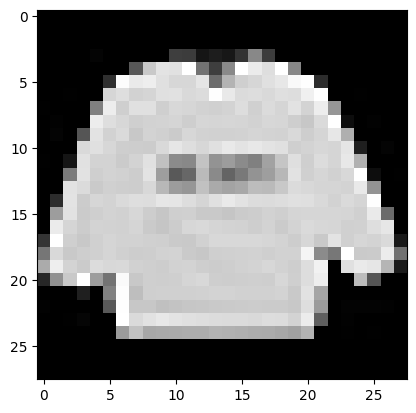

In [19]:
#displaying images
image, label = next(iter(train_set))
plt.imshow(image.squeeze(), cmap="gray")
print(label)

In [20]:
demo_loader = torch.utils.data.DataLoader(train_set, batch_size=10)

batch = next(iter(demo_loader))
images, labels = batch
print(type(images), type(labels))
print(images.shape, labels.shape)

<class 'torch.Tensor'> <class 'torch.Tensor'>
torch.Size([10, 1, 28, 28]) torch.Size([10])


- Create a data loader demo_loader for the train_set with batch size of 10
- Get the first batch of data from the loader using next(iter(demo_loader))
- Unpack the batch into images and labels variables images is a tensor of shape (10, 1, 28, 28) which contains 10 images of size 28x28 with a single color channel labels is a tensor of shape (10,) which contains the labels for the 10 images in the batch

labels:  Pullover, Ankle Boot, Shirt, T-shirt/Top, Dress, Coat, Coat, Sandal, Coat, Bag, 

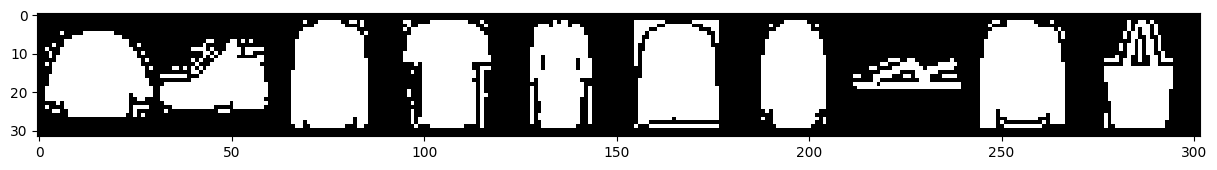

In [ ]:
#Create a grid of images from the input batch
grid = torchvision.utils.make_grid(images, nrow=10)
#Display the grid using matplotlib
plt.figure(figsize=(15, 20))
plt.imshow(np.transpose(grid, (1, 2, 0)))
# Print the labels associated with the images in the batch
print("labels: ", end=" ")
for i, label in enumerate(labels):
    print(output_label(label), end=", ")

## Building a CNN
- Make a model class (FashionCNN in our case)

- It inherits nn.Module class that is a super class for all the neural networks in Pytorch.

Our Neural Net has following layers:

- Two Sequential layers each consists of following layers-

- Convolution layer that has kernel size of 3 * 3, padding = 1 
 (zero_padding) in 1st layer and padding = 0 in second one. 

- Stride of 1 in both layer.

- Batch Normalization layer.

- Acitvation function: ReLU.

- Max Pooling layer with kernel size of 2 * 2 and stride 2.

- Flatten out the output for dense layer(a.k.a. fully connected layer).

- 3 Fully connected layer with different in/out features.

- 1 Dropout layer that has class probability p = 0.25.

All the functionaltiy is given in forward method that defines the forward pass of CNN.

Our input image is changing in a following way:
First Convulation layer : input: 28 * 28 * 3, output: 28 * 28 * 32

First Max Pooling layer : input: 28 * 28 * 32, output: 14 * 14 * 32

Second Conv layer : input : 14 * 14 * 32, output: 12 * 12 * 64

Second Max Pooling layer : 12 * 12 * 64, output: 6 * 6 * 64

Final fully connected layer has 10 output features for 10 different  clothes.

In [22]:
class FashionCNN(nn.Module):
    
    def __init__(self):
        super(FashionCNN, self).__init__()
        
        # define first convolutional layer and pooling layer
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        # define second convolutional layer and pooling layer
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        # define fully connected layers
        self.fc1 = nn.Linear(in_features=64*6*6, out_features=600)
        self.drop = nn.Dropout2d(0.25)
        self.fc2 = nn.Linear(in_features=600, out_features=120)
        self.fc3 = nn.Linear(in_features=120, out_features=10)
        
    def forward(self, x):
        # pass input through the first convolutional layer and pooling layer
        out = self.layer1(x)
        # pass output of the first layer through the second convolutional layer and pooling layer
        out = self.layer2(out)
        # flatten the output and pass it through the fully connected layers
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = self.drop(out)
        out = self.fc2(out)
        out = self.fc3(out)
        
        return out


## Making a model of our CNN class
- Creating a object(model in the code)
- Transfering it into GPU if available.
- Defining a Loss function. we're using CrossEntropyLoss() here.
  Using Adam algorithm for optimization purpose.

In [23]:
model = FashionCNN()
model.to(device)
#calculating the error using Cross-Entropy Loss
error = nn.CrossEntropyLoss()

learning_rate = 0.001
#defining optimiser
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
print(model)


FashionCNN(
  (layer1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=2304, out_features=600, bias=True)
  (drop): Dropout2d(p=0.25, inplace=False)
  (fc2): Linear(in_features=600, out_features=120, bias=True)
  (fc3): Linear(in_features=120, out_features=10, bias=True)
)


## Training a network and Testing it on test dataset

In [24]:
num_epochs = 5
count = 0
# Lists for visualization of loss and accuracy 
loss_list = []
iteration_list = []
accuracy_list = []

# Lists for knowing classwise accuracy
predictions_list = []
labels_list = []

# Looping over the specified number of epochs
for epoch in range(num_epochs):
    for images, labels in train_loader:
        # Transfering images and labels to GPU if available
        images, labels = images.to(device), labels.to(device)
    
        #   Wrapping images and labels in Variables
        train = Variable(images.view(100, 1, 28, 28))
        labels = Variable(labels)
        
        # Forward pass 
        outputs = model(train)
        loss = error(outputs, labels)
        # Initializing a gradient as 0 so there is no mixing of gradient among the batches
        optimizer.zero_grad()
        
        #Propagating the error backward
        loss.backward()
        
        # Optimizing the parameters
        optimizer.step()
    
        count += 1
    
    # Testing the model after every 50 iterations
    
        if not (count % 50):    # It's same as "if count % 50 == 0"
            total = 0
            correct = 0
             # Looping over the batches of images and labels in the testing set
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                labels_list.append(labels)
            
                test = Variable(images.view(100, 1, 28, 28))
            
                outputs = model(test)
            
                predictions = torch.max(outputs, 1)[1].to(device)
                predictions_list.append(predictions)
                correct += (predictions == labels).sum()
            
                total += len(labels)
            # Storing the loss, iteration count and accuracy for plotting
            accuracy = correct * 100 / total
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
            
        # Printing the loss and accuracy after every 500 iterations
        if not (count % 500):
            print("Iteration: {}, Loss: {}, Accuracy: {}%".format(count, loss.data, accuracy))

/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1331: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


Iteration: 500, Loss: 0.46783483028411865, Accuracy: 87.11499786376953%
Iteration: 1000, Loss: 0.3177594840526581, Accuracy: 90.88833618164062%
Iteration: 1500, Loss: 0.24452269077301025, Accuracy: 90.6816635131836%
Iteration: 2000, Loss: 0.25124597549438477, Accuracy: 91.84833526611328%
Iteration: 2500, Loss: 0.2013114094734192, Accuracy: 92.68499755859375%
Iteration: 3000, Loss: 0.2345600128173828, Accuracy: 93.80333709716797%


# Visualizing the Loss and Accuracy with Iterations

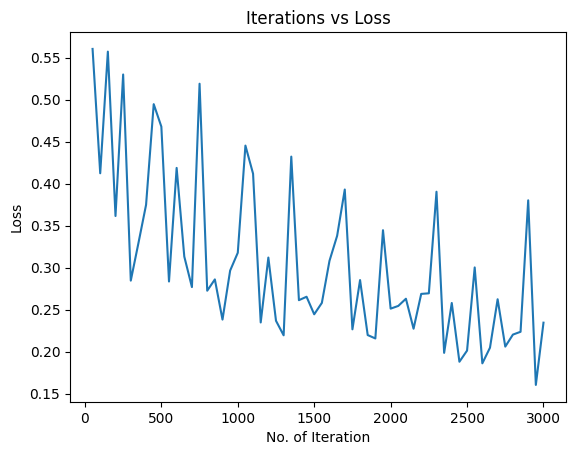

In [25]:
#plot for  Iteration vs Loss
plt.plot(iteration_list, loss_list)
plt.xlabel("No. of Iteration")
plt.ylabel("Loss")
plt.title("Iterations vs Loss")
plt.show()

# Observations

- The behavior during the training of a neural network using gradient descent optimization is as expected.
- As we increase the number of iterations, the model continues to optimize the parameters and the loss tends to decrease. 
- The loss represents the difference between the predicted output and the actual output, and the goal of the optimization is to minimize this difference. 
- As the network is trained on more and more data, the parameters are adjusted to better approximate the true function that maps input to output, and the loss decreases accordingly

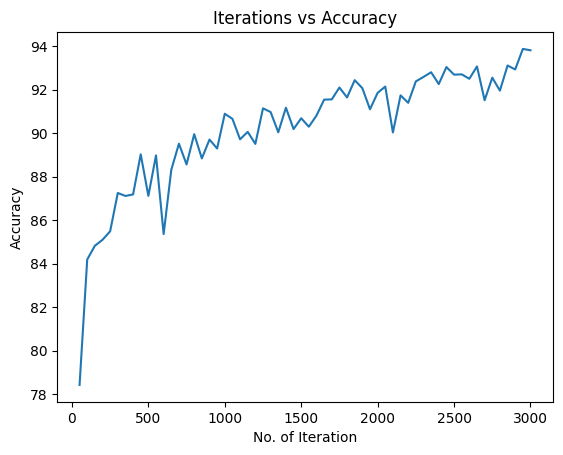

In [26]:
#plot for iterations Vs Accuracy
plt.plot(iteration_list, accuracy_list)
plt.xlabel("No. of Iteration")
plt.ylabel("Accuracy")
plt.title("Iterations vs Accuracy")
plt.show()

# Observations
- As the number of iterations or epochs increases, the neural network gradually learns to better fit the training data and generalize to unseen data. 
- This means that the accuracy of the neural network, which is typically measured as the percentage of correct predictions on the test set, also improves with the number of iterations.

In [27]:
#calculating accuracy of trained model
class_correct = [0. for _ in range(10)]
total_correct = [0. for _ in range(10)]

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        test = Variable(images)
        outputs = model(test)
        predicted = torch.max(outputs, 1)[1]
        c = (predicted == labels).squeeze()
        
        for i in range(100):
            label = labels[i]
            class_correct[label] += c[i].item()
            total_correct[label] += 1
        
for i in range(10):
    print("Accuracy of {}: {:.2f}%".format(output_label(i), class_correct[i] * 100 / total_correct[i]))

Accuracy of T-shirt/Top: 88.17%
Accuracy of Trouser: 99.63%
Accuracy of Pullover: 86.18%
Accuracy of Dress: 95.65%
Accuracy of Coat: 91.03%
Accuracy of Sandal: 98.35%
Accuracy of Shirt: 84.95%
Accuracy of Sneaker: 95.50%
Accuracy of Bag: 99.33%
Accuracy of Ankle Boot: 99.13%


# Printing the Confusion Matrix

In [28]:
from itertools import chain 

predictions_l = [predictions_list[i].tolist() for i in range(len(predictions_list))]
labels_l = [labels_list[i].tolist() for i in range(len(labels_list))]
predictions_l = list(chain.from_iterable(predictions_l))
labels_l = list(chain.from_iterable(labels_l))

This code takes the predictions_list and labels_list, which contain the predicted labels and actual labels for each batch of the test dataset, and converts them to flat lists. The tolist() method is used to convert the predicted and actual label tensors to Python lists. Then, the itertools.chain.from_iterable() method is used to flatten the list of lists into a single flat list. The resulting predictions_l and labels_l lists contain all the predicted and actual labels for the test dataset

In [29]:
import sklearn.metrics as metrics

confusion_matrix(labels_l, predictions_l)
print("Classification report for CNN :\n%s\n"
      % (metrics.classification_report(labels_l, predictions_l)))

Classification report for CNN :
              precision    recall  f1-score   support

           0       0.85      0.84      0.85    360000
           1       0.99      0.98      0.98    360000
           2       0.84      0.86      0.85    360000
           3       0.88      0.92      0.90    360000
           4       0.85      0.83      0.84    360000
           5       0.97      0.97      0.97    360000
           6       0.74      0.72      0.73    360000
           7       0.95      0.95      0.95    360000
           8       0.98      0.98      0.98    360000
           9       0.96      0.96      0.96    360000

    accuracy                           0.90   3600000
   macro avg       0.90      0.90      0.90   3600000
weighted avg       0.90      0.90      0.90   3600000




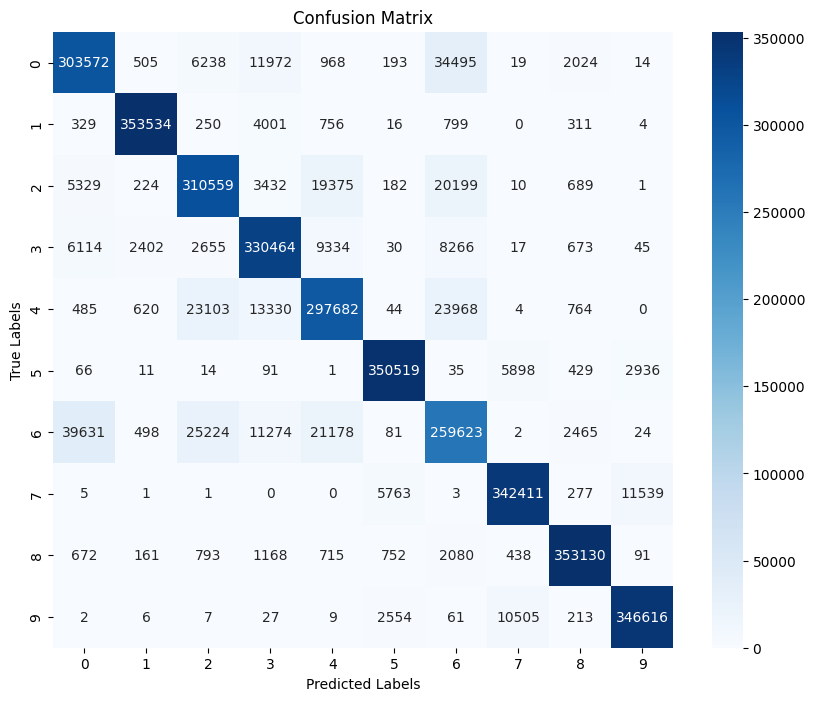

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Assuming you have already calculated the confusion matrix
cm = confusion_matrix(labels_l, predictions_l)

# Get the unique class labels
class_labels = np.unique(labels_l)

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()




## Observations
- After analyzing the results, it is found that a significant portion of T-shirts were inaccurately categorized as Shirts by the model.
-Additionally, there were some instances where Shirts were incorrectly classified as Coats. 
- Our model predicted 93% of Test Images correctly, which indicates that the model did pretty good job in generalizing the data

## Conclusion

In conclusion, the CNN model trained on the Fashion MNIST dataset has demonstrated strong performance, achieving an accuracy of 93% on the test set. The high accuracy indicates that the model has learned to effectively classify images in the dataset, showcasing its generalization capability to accurately classify new, unseen data. The achieved accuracy also suggests that the model is suitable for similar image classification tasks. However, further improvements could be explored through techniques such as hyperparameter tuning, data augmentation, or model architecture modifications. The evaluation metrics such as confusion matrix and classification report provide additional insights into the model's performance, allowing for identification of classes with lower accuracy or higher misclassification rates. It's important to interpret these conclusions in context with the specific task, dataset, and evaluation metrics used, and to thoroughly validate the model's performance before drawing definitive conclusions

## References
- https://www.tensorflow.org/tutorials/keras/classification
- https://blog.tensorflow.org/2020/01/hyperparameter-tuning-with-keras-tuner.html
- https://www.simplilearn.com/tutorials/deep-learning-tutorial/keras-tuner
- https://github.com/https-deeplearning-ai/tensorflow-1-public/blob/main/C1/W4/ungraded_labs/C1_W4_Lab_1_image_generator_no_validation.ipynb
- https://www.analyticsvidhya.com/blog/2021/06/create-convolutional-neural-network-model-and-optimize-using-keras-tuner-deep-learning/

## Licensing
Copyright 2023 Akshatha Patil

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE